<a href="https://colab.research.google.com/github/Anjasfedo/Code-as-a-Cryptography/blob/main/lsb_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

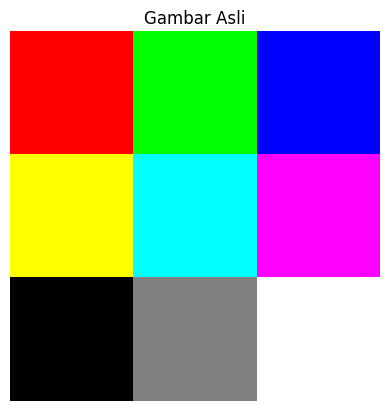

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def display_image(image, title="Gambar"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')  # Hilangkan sumbu
    plt.show()

# Contoh penggunaan
# Buat gambar 3x3 dengan warna putih
image = Image.new('RGB', (3, 3), color=(255, 255, 255))

# Define RGB values for each pixel (3x3 grid)
pixels = [
    (255, 0, 0), (0, 255, 0), (0, 0, 255),   # Red, Green, Blue
    (255, 255, 0), (0, 255, 255), (255, 0, 255), # Yellow, Cyan, Magenta
    (0, 0, 0), (128, 128, 128), (255, 255, 255) # Black, Gray, White
]

# Update the image with these pixel values
image.putdata(pixels)

display_image(image, "Gambar Asli")

In [9]:
# Fungsi untuk menampilkan RGB dan nilai biner setiap piksel
def display_pixel_values(image):
    # Dapatkan data piksel dari gambar
    pixels = list(image.getdata())

    print("RGB dan Nilai Biner untuk setiap piksel:")
    for i, pixel in enumerate(pixels):
        # Pisahkan nilai R, G, B
        r, g, b = pixel

        # Konversi nilai R, G, B ke biner
        r_bin = f'{r:08b}'
        g_bin = f'{g:08b}'
        b_bin = f'{b:08b}'

        print(f"Piksel {i+1}: RGB ({r}, {g}, {b}) - Biner (R: {r_bin}, G: {g_bin}, B: {b_bin})")

display_pixel_values(image)

RGB dan Nilai Biner untuk setiap piksel:
Piksel 1: RGB (255, 0, 0) - Biner (R: 11111111, G: 00000000, B: 00000000)
Piksel 2: RGB (0, 255, 0) - Biner (R: 00000000, G: 11111111, B: 00000000)
Piksel 3: RGB (0, 0, 255) - Biner (R: 00000000, G: 00000000, B: 11111111)
Piksel 4: RGB (255, 255, 0) - Biner (R: 11111111, G: 11111111, B: 00000000)
Piksel 5: RGB (0, 255, 255) - Biner (R: 00000000, G: 11111111, B: 11111111)
Piksel 6: RGB (255, 0, 255) - Biner (R: 11111111, G: 00000000, B: 11111111)
Piksel 7: RGB (0, 0, 0) - Biner (R: 00000000, G: 00000000, B: 00000000)
Piksel 8: RGB (128, 128, 128) - Biner (R: 10000000, G: 10000000, B: 10000000)
Piksel 9: RGB (255, 255, 255) - Biner (R: 11111111, G: 11111111, B: 11111111)


In [18]:
def get_lsb_from_num(value):
    lsb = value & 1
    return lsb

def get_lsb_from_bits(bit_str):
    return int(bit_str[-1])

def num_to_bit(num):
    return bin(num)[2:]

char = "A"
value = ord(char)
bit = num_to_bit(value)
lsb1 = get_lsb_from_num(value)
lsb2 = get_lsb_from_bits(bit)
print(lsb1 == lsb2)
print(f"Char: {char} (ASCII: {value}) (binary: {bit}) (LSB: {lsb1})")

True
Char: A (ASCII: 65) (binary: 1000001) (LSB: 1)


In [41]:
def change_lsb(value, new_lsb):
    if new_lsb not in [0, 1, '0', '1']:
        raise ValueError("new_lsb must be either 0 or 1.")

    new_lsb = int(new_lsb)

    # Clear the current LSB using bitwise AND with ~1 (which is -2 in binary)
    value = value & ~1

    # Set the new LSB using bitwise OR if new_lsb is 1
    value = value | new_lsb

    return value

# Other functions (unchanged)
def get_lsb_from_num(value):
    lsb = value & 1
    return lsb

def get_lsb_from_bits(bit_str):
    return int(bit_str[-1])

def num_to_bit(num):
    return bin(num)[2:]

def num_to_binary(num):
    return bin(num)[2:].zfill(8)

# Example usage
char = "A"
value = ord(char)
bit = num_to_bit(value)
lsb1 = get_lsb_from_num(value)
lsb2 = get_lsb_from_bits(bit)

# Changing the LSB to 1
new_value = change_lsb(value, 1)
new_bit = num_to_bit(new_value)
new_lsb = get_lsb_from_num(new_value)

print(f"Original char: {char} (ASCII: {value}) (binary: {bit}) (LSB: {lsb1})")
print(f"Modified value: {new_value} (binary: {new_bit}) (New LSB: {new_lsb})")

# Changing the LSB back to 0
new_value_0 = change_lsb(value, 0)
new_bit_0 = num_to_bit(new_value_0)
new_lsb_0 = get_lsb_from_num(new_value_0)

print(f"Modified value (LSB 0): {chr(new_value_0)} (ASCII: {new_value_0}) (binary: {new_bit_0}) (New LSB: {new_lsb_0})")

Original char: A (ASCII: 65) (binary: 1000001) (LSB: 1)
Modified value: 65 (binary: 1000001) (New LSB: 1)
Modified value (LSB 0): @ (ASCII: 64) (binary: 1000000) (New LSB: 0)


In [23]:
bit

'1000001'

In [55]:
def embbed(image, message):
    # Dapatkan data piksel dari gambar
    pixels = list(image.getdata())

    message_bits = num_to_bit(ord(message))
    print(message_bits)
    message_bits_len = len(message_bits)
    print(message_bits_len)

    msg_idx = 0
    for i, pixel in enumerate(pixels):
        for j in pixel:
          # print(j)

          if msg_idx < len(message_bits):
            j = change_lsb(j, message_bits[msg_idx])
            msg_idx += 1

          hex = num_to_binary(j)
          print(hex)


embbed(image, 'A')

1000001
7
11111111
00000000
00000000
00000000
11111110
00000000
00000001
00000000
11111111
11111111
11111111
00000000
00000000
11111111
11111111
11111111
00000000
11111111
00000000
00000000
00000000
10000000
10000000
10000000
11111111
11111111
11111111
